# <font color=red> A Porta do bar Suvaco Seco: O Boss Supremo
## Introdução

No RPG "O Segredo na Floresta", do streamer brasileiro Cellbit, em dada situação os personagens Thiago Fritz (Rakin) e César Oliveira Cohen (Calango) querem arrombar uma porta de madeira. Para isso, Thiago tenta rolar um d100 e tirar normal, bom ou extremo (aqui definido pelo intervalos 70>=x>35, 35>=x>14 e 14>=x>=1, respectivamente), e não pode tirar desastre (x=100) - pois assim falha automáticamente e toma 4 pontos de dano físico-; além disso, se tirar crítico (x=1), tem um sucesso perfeito imediato. Se falhar, exceto se tiver um desastre, ele tem direito de forçar a ação realizando outra rolagem, entretanto, se falhar novamente, sua ação terá consequências mais pesadas (nesse caso, toma 1d4 de dano físico). Se Thiago, ao final de sua rodada, falhou, César faz o mesmo processo. Nesse contexto, Thiago falhou em sua primeira rolagem, falhou na rolagem forçada e tomou 1 ponto de dano; César, então, tentou arrombar a porta e também falhou em ambas as rolagens, tomando 3 de dano.

Neste trabalho, replicaremos essa situação de arrombamento em um RPG no sistema de Ordem Paranormal: O Segredo na Floresta através de uma simulação computacional, com a hipótese de que, mesmo em 1000 cenas em universos paralelos, é quase impossível (há uma probabilidade extremamente pequena) que ambos os personagens falhem e se machuquem com uma porta de madeira, motivo pelo qual a cena de referência é tão cômica e aclamada pelo famdom da série. Para isso, usaremos as bibliotecas Random e Matplotlib do Python, simulando as rolagens por meio de loop for e impondo as condições com o condicional if, por fim, com o armazenamento de dados, plotaremos histogramas para análise dos resultados.

In [1]:
import random as rd
import matplotlib.pyplot as plt

In [2]:
def d100 ():
    d = rd.choice([0,1,2,3,4,5,6,7,8,9])
    u = rd.choice([0,1,2,3,4,5,6,7,8,9])
    roll = d*10 + u
    if roll == 0:
        roll = 100
    return roll
d100()

70

In [3]:
def d4 ():
    roll = rd.choice([1,2,3,4])
    return roll
d4()

3

In [273]:
def player_vs_porta(n_amostras):
    
    amostras = []
    #definimos um resultado de base
    # "X" indica que não houve rolagem pois os personagens já tiveram sucesso ou desastre
    for n in range(n_amostras):
        result = ["Sucesso", "X", "X", "X", "X", "X"] # [t_roll, t_forcar, t_dano, c_roll, c_forcar, c_dano]
        
        #primeira rolagem do thiago
        t_roll = d100() 
        
        if t_roll == 100:
            result[0] = "DESASTRE!"
        
        elif 100 > t_roll > 70:
            result[0] = "Fracasso"
            
            #segunda rolagem
            t_forcar = d100()
            
            
            if t_forcar == 100:
                result[1] = "DESASTRE!"
                
            elif 100 > t_forcar > 70:
                result[1] = "Fracasso"
                
                #dano
                t_dano = d4()
                result[2] = f"Dano = {t_dano}"
                
                #primeira rolagem do césar
                c_roll = d100()
                
                if c_roll == 100:
                    result[3] = "DESASTRE!"
                
                elif 100 > c_roll > 70:
                    result[3] = "Fracasso"
                    c_forcar = d100()
                    
                    #Segunda rolagem
                    
                    if c_forcar == 100:
                        result[4] = "DESASTRE!"
                    
                    elif 100 > c_forcar > 70:
                        result[4] = "Fracasso"
                        c_dano = d4()
                        result[5] = f"Dano = {c_dano}"
                        
                    #sucessos forçados do cesar
                    elif 70>= c_forcar > 35:
                        result[4] = "Normal"

                    elif 35 >= c_forcar > 14:
                        result[4] = "Bom"

                    elif 14 >= c_forcar > 1:
                        result[4] = "Extremo!"

                    elif c_forcar == 1:
                        result[4] = "CRÍTICO!!"
                        
                #sucessos do cesar
                elif 70>= c_roll > 35:
                    result[3] = "Normal"

                elif 35 >= c_roll > 14:
                    result[3] = "Bom"

                elif 14 >= c_roll :
                    result[3] = "Extremo!"

                elif c_roll == 1:
                    result[3] = "CRÍTICO!!"
                        
            #sucessos forçados do thiago
            elif 70>= t_forcar > 35:
                result[1] = "Normal"
            
            elif 35 >= t_forcar > 14:
                result[1] = "Bom"

            elif 14 >= t_forcar > 1:
                result[1] = "Extremo!"

            elif t_forcar == 1:
                result[1] = "CRÍTICO!!"
                        
        # Sucessos do thiago
        elif 70>= t_roll > 35:
            result[0] = "Normal"
            
        elif 35 >= t_roll > 14:
            result[0] = "Bom"
            
        elif 14 >= t_roll > 1:
            result[0] = "Extremo!"
            
        elif t_roll == 1:
            result[0] = "CRÍTICO!!"
        
        amostras.append(result)
        
    return amostras
            
teste = player_vs_porta (10)
teste

[['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Fracasso', 'Dano = 3', 'Fracasso', 'Normal', 'X'],
 ['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Fracasso', 'Dano = 3', 'Fracasso', 'Fracasso', 'Dano = 4'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X']]

In [297]:
def analise_pvp (amostras):
    
    t_rolls = []
    t_forcar = []
    t_dano = []
    c_rolls =[]
    c_forcar = []
    c_dano = []
    t_falha = []
    ambos_falham = []
    
    for n in range(len(amostras)):
        t_rolls.append(amostras[n][0])
        t_forcar.append(amostras[n][1])
        t_dano.append(amostras[n][2])
        c_rolls.append(amostras[n][3])
        c_forcar.append(amostras[n][4])
        c_dano.append(amostras[n][5])
        if t_dano[n] != "X":
            t_falha.append(t_dano[n])
        if c_dano[n] != "X":
            ambos_falham.append(c_dano[n])
            
        
    plt.hist(t_rolls, log=True)
    plt.title("Rolagens do Thiago")
    plt.xlabel("Rolagens")
    plt.ylabel("Ocorrências")
    plt.show()
    
    plt.hist(t_forcar, log=True)
    plt.title("Rolagens forçadas do Thiago")
    plt.xlabel("Rolagens")
    plt.ylabel("Ocorrências")
    plt.show()
    
    plt.hist(t_dano, log=True)
    plt.title("Danos físicos que a porta deu no Thiago")
    plt.xlabel("Rolagens")
    plt.ylabel("Ocorrências")
    plt.show()
    
    plt.hist(c_rolls, log = True)
    plt.title("Rolagens do César")
    plt.xlabel("Rolagens")
    plt.ylabel("Ocorrências")
    plt.show()
    
    plt.hist(c_forcar, log = True)
    plt.title("Rolagens forçadas do César")
    plt.xlabel("Rolagens")
    plt.ylabel("Ocorrências")
    plt.show()
    
    plt.hist(c_dano, log=True)
    plt.title("Danos físicos que a porta deu no César")
    plt.xlabel("Rolagens")
    plt.ylabel("Ocorrências")
    plt.show()
    
    return f"Houve um total de {len(amostras)} amostras. Thiago se machuca e César tem que jogar em {len(t_falha)} vezes. Ambos se machucam {len(ambos_falham)} vezes."

In [294]:
amostras = player_vs_porta(1000)
amostras

[['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Fracasso', 'Dano = 1', 'Fracasso', 'Bom', 'X'],
 ['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X'],
 ['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Fracasso', 'Dano = 4', 'Bom', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X'],
 ['CRÍTICO!!', 'X', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X'],
 ['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Extremo!', 'X', 'X', 'X', 'X', 'X'],
 ['Fracasso', 'Normal', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Normal', 'X', 'X', 'X', 'X', 'X'],
 ['Bom', 'X', 'X', 'X', 'X', 'X'],
 ['Fr

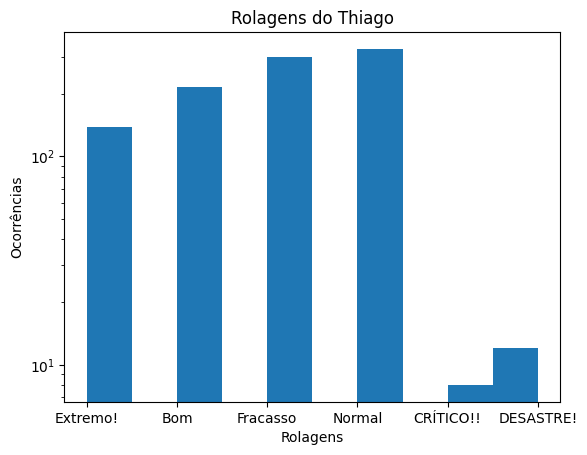

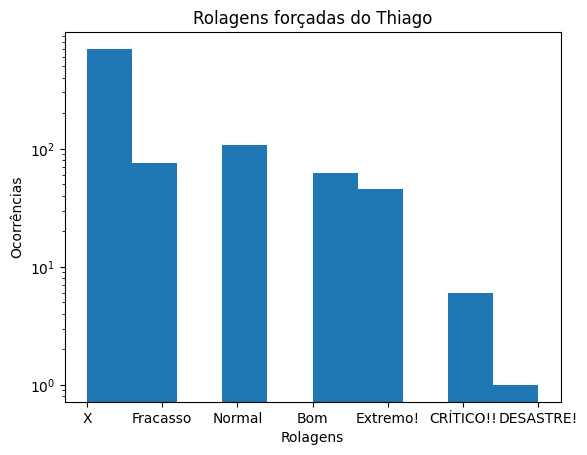

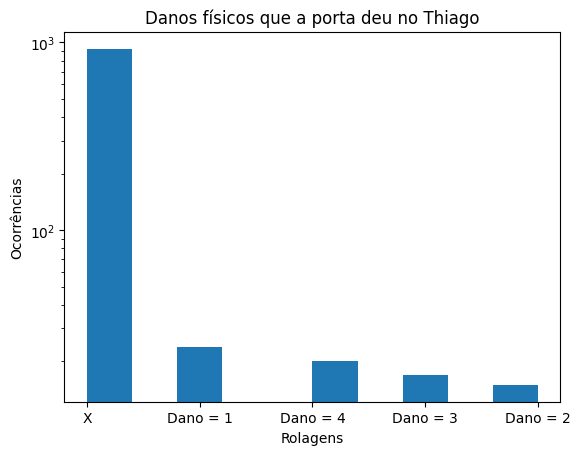

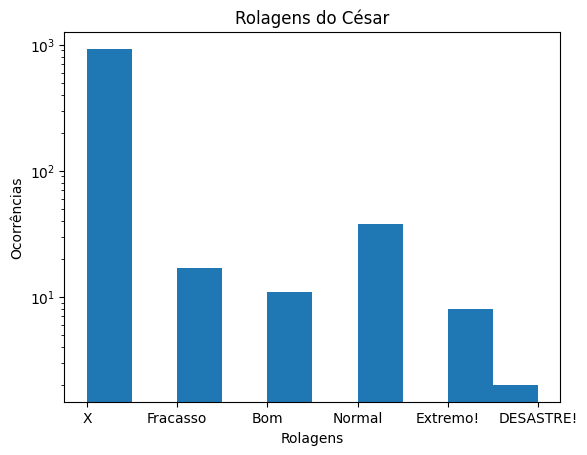

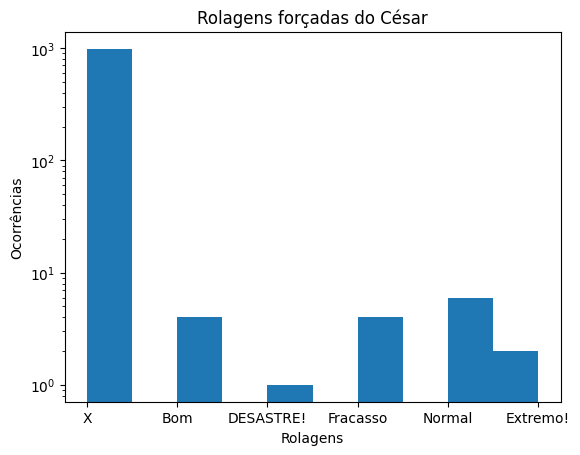

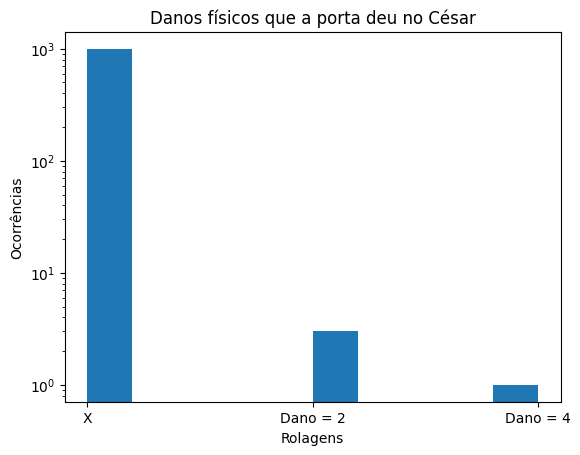

'Houve um total de 1000 amostras. Thiago se machuca e César tem que jogar em 76 vezes. Ambos se machucam 4 vezes.'

In [298]:
analise_pvp(amostras)

### Discussões
Realizando uma simulção da cena descrita, foram coletadas 1000 amostras do tipo de sucesso ou fracasso de cada rolagens, quando estas ocorreram, e quando necessário, do valor dos danos tomados pelos personagens. Com os dados armazenados na forma de listas, foram plotados os 6 histogramas acima, referentes a cada rolagem da cena. É importante ressaltar que os histogramas estão na escala logaritmica.

Na primeira rolagem, que sempre é feita pelo primeiro personagem, percebemos uma boa distribuição dos dados de acordo com a proporção esperada, com maior ocorrência de dados "normal", seguido de "fracasso", "bom", e "extremo", além de menos de 20 ocorrência de "críticos" e "desastres".

Na segunda rolagem, realizada pelo primeiro personagem apenas quando ele obtém um "fracasso" na anterior, também percebemos a distribuição esperada de ocorrências de dados "normal", "fracasso", "bom", "extremo", "críticos" e "desastres", entretanto, pouco mais de 700 cenas (porcentagem próxima da probabilidade esperada, de 71%) não necessitaram de rolagem a partir daqui, visto que aqueles que tiraram "normal", "bom", "extremo" ou "crítico" na rolagem anterior já conseguiram passar no teste, ou tiveram um "desastre" que impossibilitou definitivamente a abertura da porta. Dos mais de 200 que falharam no primeiro teste, 76 tiveram fracasso (porcentagem de 38/100 próxima da probabilidade esperada, de 29%, considerando o menor espaço amostral), e a distribuição de danos se deu entre 10 e 25 para cada valor de 1 a 4. Curioso notar que 1, o exato dano tomado por Thiago na cena de referência, foi o dado de maior ocorrência nessa situação.

A essa altura do campeonato, mais de 900 cenas já conseguiram arrombar a porta. Entre as primeiras rolagens do segundo personagem nos demais 76 universos, 19 foram fracassadas (25%, sendo 29% a probabilidade esperada), mantendo o padrão de ocorrências decrescente "normal", "bom", "extremo" e "desastre". É interessante notar aqui que não há ocorrência de "crítico", o que é válido pela grande redução de eventos de possíveis rolagens.

Por fim, nas últimas rolagens nas cenas em que o teste ainda não foi bem sucedido, a distribuição das ocorrências se manteve como esperado, com apenas 4 cenas das 1000 analisadas falhando no teste final. Podemos notar aqui, também, a ausência da ocorrência de dados "críticos". Dos danos tomados pelo segundo personagem, houveram três universos em que houve perda de 2 pontos de vida e um em que houve perda de 4. É interessante notar a ausência de 3, dano tomado por César no RPG, mas isto se justifica pela baixíssima quantidade de amostras restantes nessa situação.

Concluímos, então, que a cena usada como referência nesse projeto apresenta uma propabilidade extremamente baixa de acontecer, vista em apenas 0,4% dos casos analisados em nossa amostragem simulada. Assim, podemos observar que nossa hipótese de que tal cena é extensamente lembrada pelos espectadores da série Ordem Paranormal: O Segredo na Floresta - O RPG devido à sua baixíssima chance de ocorrência é justificada empiricamente, com os players fazendo quase o impossível na única chance que tinham, tornando-a extremamente cômica e icônica.

## Conclusões

Neste trabalho, simulamos computacionalmente uma cena do RPG O Segredo na Floresta, do Cellbit, buscando justificar sua grande relevância entre o público da série, apesar da pouca influência no enredo da obra. Dessa forma, percebemos empiricamente que a situação em questão tem uma baixíssima probabilidade de ocorrer, de apenas 0,4%, o que leva os personagens a uma ação e consequência bobas, provando o ponto que isso é um dos principais fatores para sua comicidade - visto que dois personagens fortes e reconhecidos foram feridos tentando arrombar uma porta com um chute.

### Referências

LANGE, Rafael. "Virgulino" - Episódio 6 - O Segredo Na Floresta RPG. Cellbit Lives, 2020. Disponível em: https://www.youtube.com/watch?v=03Led-EYcA8. Acesso em: 21 Ago 2024. 

SCHERMAK, Anna. Como jogar THE CALL OF CTHULHU RPG? (O CHAMADO DE CTHULHU RPG). Pausa Para um Café - Anna Schermak, 2023. Disponível em: https://youtu.be/keSBzMnPKtY?si=CHIp1H9k7zJorG1I. Acesso em: 20 Ago 2024.

HUNTER, J. D. matplotlib.pyplot.hist. "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007. Disponível em: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html. Acesso em: 21 Ago 2024.